In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/emnist-balanced-train.csv  
  inflating: data/emnist-balanced-test.csv  
  inflating: data/datasets_7160_10705_emnist-balanced-mapping.txt  


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import load_model
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [0]:
train = pd.read_csv("../data/emnist-balanced-train.csv")
test = pd.read_csv("../data/emnist-balanced-test.csv")

In [15]:
train.head()


,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def load_char_mappings(mapping_path):
    """
    load EMNIST character mappings. This maps a label to the correspondent byte value of the given character
    return: the dictionary of label mappings
    """
    mappings = {}
    with open(mapping_path) as f:
        for line in f:
            (key, val) = line.split()
            mappings[int(key)] = int(val)

    return mappings

In [0]:
def rotate(img):
    flipped = np.fliplr(img.reshape(28,28))
    return np.rot90(flipped).reshape(784,)

In [0]:
num_classes = 47


In [19]:
y_train = train.iloc[:,0]
y_train = np_utils.to_categorical(y_train, num_classes)
print ("y_train:", y_train.shape)

y_train: (112799, 47)


In [20]:
x_train = train.iloc[:,1:]
x_train = x_train.astype('float32')
x_train /= 255
print ("x_train:",x_train.shape)

x_train: (112799, 784)


In [21]:
y_test = test.iloc[:,0]
y_test = np_utils.to_categorical(y_test, num_classes)
print ("y_test:", y_test.shape)

y_test: (18799, 47)


In [22]:
x_test = test.iloc[:,1:]
x_test = x_test.astype('float32')
x_test /= 255
print ("x_test:",x_test.shape)

x_test: (18799, 784)


In [0]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

In [24]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
print(x_train.shape)
print(x_test.shape)

(112799, 28, 28, 1)
(18799, 28, 28, 1)


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=200, verbose=2)

Train on 112799 samples, validate on 18799 samples
Epoch 1/5
 - 57s - loss: 1.0727 - accuracy: 0.6897 - val_loss: 0.6705 - val_accuracy: 0.7970
Epoch 2/5
 - 58s - loss: 0.5739 - accuracy: 0.8161 - val_loss: 0.5453 - val_accuracy: 0.8283
Epoch 3/5
 - 58s - loss: 0.4850 - accuracy: 0.8400 - val_loss: 0.4843 - val_accuracy: 0.8438
Epoch 4/5
 - 59s - loss: 0.4354 - accuracy: 0.8541 - val_loss: 0.4598 - val_accuracy: 0.8474
Epoch 5/5
 - 57s - loss: 0.4034 - accuracy: 0.8613 - val_loss: 0.4444 - val_accuracy: 0.8539


In [0]:
model.save('my_model.h5')


In [0]:
y_predict = model.predict(x_test)
score = model.evaluate(x_test, y_test, verbose=0)


In [36]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4443741590458381
Test accuracy: 0.8539283871650696


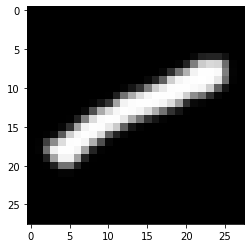

In [34]:
import matplotlib.pyplot as plt

c = x_test[1000]
c = c.reshape(28,28)
plt.gray()
plt.imshow(c.reshape(28,28))

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = np.argmax(predictions_array), np.argmax(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.reshape(28,28), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {} ({})".format(predicted_label,
                                predictions_array,
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


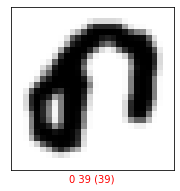

In [62]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
plot_image(i, y_predict[i], y_test, x_test)
plt.subplot(1,1,1)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


ValueError: ignored

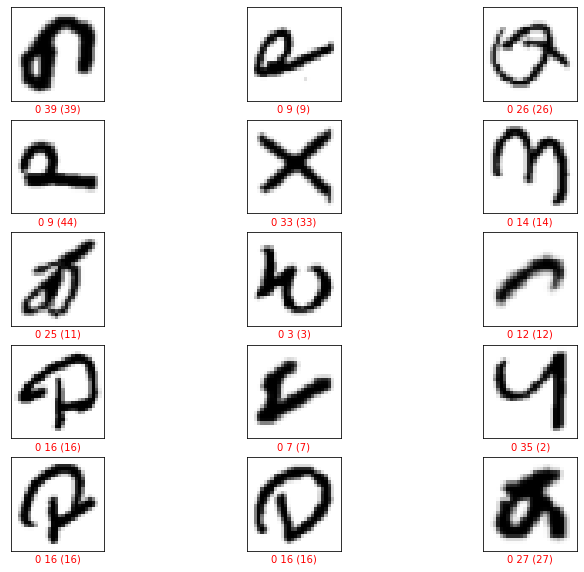

In [63]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 1*num_cols, 1*i+1)
  plot_image(i, y_predict[i], y_test, x_test)
  plt.subplot(num_rows, 1*num_cols, 1*i+2)
plt.tight_layout()
plt.show()